# Análise de Séries Temporais

## Pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando os Dados

In [2]:
# prompt: Gera uma conexão com o drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carregando o dataset
file = '/content/drive/MyDrive/2-Estudos/2-Qualificação Profissional/2-Cursos em Andamento com certificado/Python Para Análise de Dados e Data Science/Cap16 - Séries Temporais/1-Cap16/dataset.csv'
df = pd.read_csv(file)

In [4]:
df.shape

(365, 2)

In [5]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [6]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


## Pré-Processamento dos Dados

In [7]:
# Valor mínimo da Data
df['Data'].min()

'2023-01-01'

In [8]:
# Valor máximo da Data
df['Data'].max()

'2023-12-31'

In [9]:
# Informaçãoes das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [10]:
# Convertando a coluna de data em tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

In [11]:
# Informaçãoes das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [12]:
# Convertendo o DataFrame em uma série temporal com a data como índice
serie_temporal = df.set_index('Data')['Total_Vendas']

In [13]:
type(serie_temporal)

pandas.core.series.Series

In [14]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [15]:
serie_temporal = serie_temporal.asfreq('D')

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise Exploratória

Text(0.5, 1.0, 'Série Temporal de Vendas')

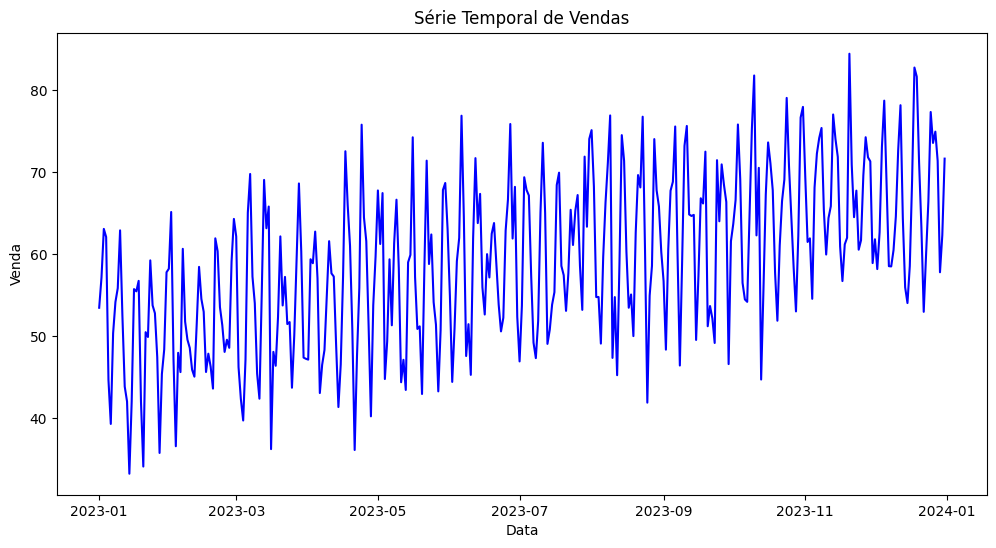

In [19]:
plt.figure(figsize = (12,6))

plt.plot(serie_temporal, color = 'blue')

plt.xlabel('Data')
plt.ylabel('Venda')
plt.title('Série Temporal de Vendas')

## Suavização Exponencial

In [20]:
# Criando o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [21]:
# Treinando o modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [23]:
# Extraindo valores previsto pelo modelo
suavizaco_exponencial = modelo_ajustado.fittedvalues

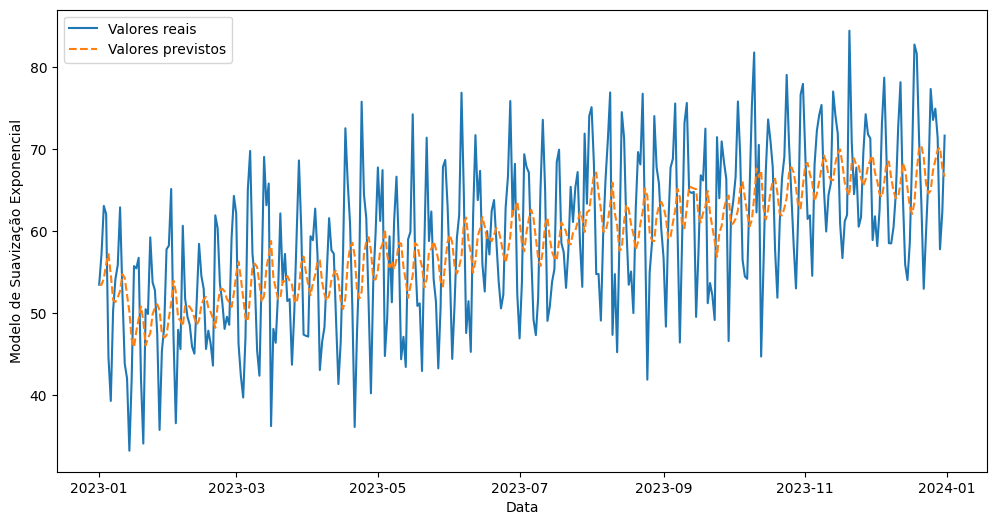

In [24]:
# Plot
plt.figure(figsize = (12,6))

plt.plot(serie_temporal, label = 'Valores reais')
plt.plot(suavizaco_exponencial, label = 'Valores previstos', linestyle = '--')

plt.xlabel('Data')
plt.ylabel('Modelo de Suavização Exponencial')
plt.legend()

## Deploy e Previsão com Modelo

In [26]:
# Fazendo previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [28]:
print('Previsão do Total de Vendas para Janeiro/2024: {}'.format(round(previsoes[0], 2)))

Previsão do Total de Vendas para Janeiro/2024: 67.65
